In [1]:
#downloading the loan prediction dataset from kaggle dataset
#importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#loading data to pandas DataFrame
loan_Dataset = pd.read_csv("train.csv")

In [3]:
loan_Dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking shape
loan_Dataset.shape

(614, 13)

In [5]:
#chicking missing values
loan_Dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#droping the missing values because we cannot fill with mean
loan_Dataset=loan_Dataset.dropna()
loan_Dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## label Encoding

In [7]:
#changing Y and N  with 0 and 1
#using dictionary method
loan_Dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [8]:
loan_Dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [9]:
#chacking type of values in dependents column
loan_Dataset['Dependents'].value_counts()


0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [10]:
#changing 3+ with 3 because we want to train our model on a numerical value
loan_Dataset = loan_Dataset.replace(to_replace='3+', value=3)
loan_Dataset['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

## Data Visualisation

<AxesSubplot:xlabel='Education', ylabel='count'>

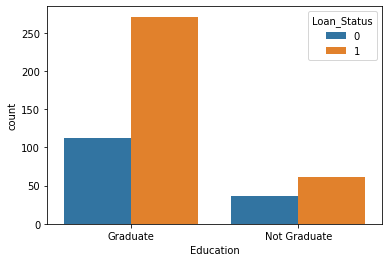

In [11]:
#ploting countplot to check dependency of education over loan
sns.countplot(x= "Education", hue ="Loan_Status", data = loan_Dataset)
#it shous if a person is graduated he have a higher chance of getting loan

<AxesSubplot:xlabel='Gender', ylabel='count'>

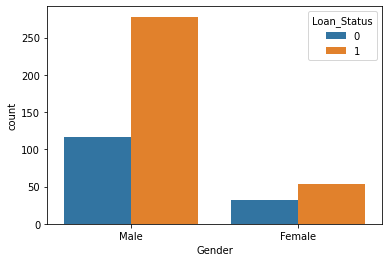

In [12]:
sns.countplot(x= "Gender", hue ="Loan_Status", data = loan_Dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

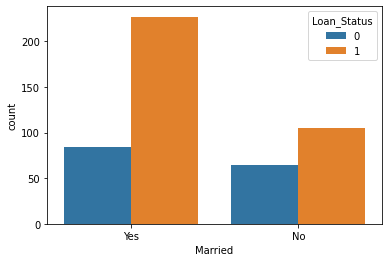

In [13]:
sns.countplot(x= "Married", hue ="Loan_Status", data = loan_Dataset)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

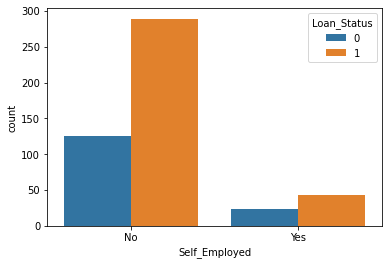

In [14]:
sns.countplot(x= "Self_Employed", hue ="Loan_Status", data = loan_Dataset)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

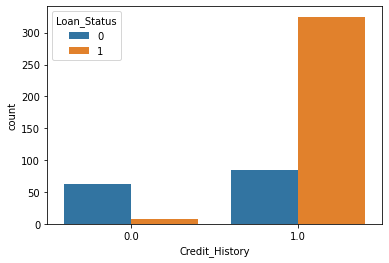

In [15]:
sns.countplot(x= "Credit_History", hue ="Loan_Status", data = loan_Dataset)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

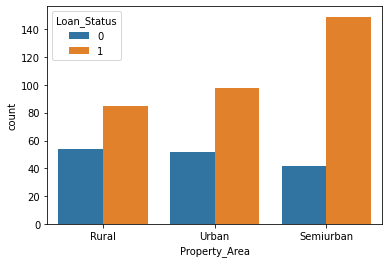

In [16]:
sns.countplot(x= "Property_Area", hue ="Loan_Status", data = loan_Dataset)

In [23]:
#we have to convertt categorical columns(text data) to numerical value
loan_Dataset.replace({'Married':{'No':0,'Yes':1}},inplace=True)
loan_Dataset.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
loan_Dataset.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
loan_Dataset.replace({'Self_Employed':{'No':1,'Yes':0}},inplace=True)
loan_Dataset.replace({'Property_Area':{'Rural':0,'Semiurban':1, 'Urban':2}},inplace=True)

In [18]:
loan_Dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,1,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,1,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,1,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,0,5417,4196.0,267.0,360.0,1.0,2,1


## Training

In [24]:
# to train our data first we need to seperate label from training set 
#we also dont need loan ID to train our model so we will drop it
X=loan_Dataset.drop(columns=["Loan_ID","Loan_Status"], axis=1)
Y=loan_Dataset["Loan_Status"]

In [25]:
#Now we will split our data set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, stratify=Y, random_state=2 )

## Using our model


In [26]:
model = svm.SVC(kernel='linear')


In [27]:
#training the support vector machine model
model.fit(X_train,Y_train)

SVC(kernel='linear')

## Model Evaluatiom

In [30]:
#accuracy score on trainning
X_train_prediction = model.predict(X_train)
train_score = accuracy_score(X_train_prediction, Y_train)
train_score

0.8009259259259259

In [31]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_score = accuracy_score(X_test_prediction, Y_test)
test_score

0.8333333333333334